In [45]:
import tensorflow as tf 
from tensorflow import keras
import warnings
warnings.filterwarnings('ignore')

In [46]:
tf.__version__

'2.8.0'

In [47]:
keras.__version__

'2.8.0'

In [111]:
(X_train , y_train) , (X_test , y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [112]:
print("X_train " , X_train.shape)
print('y_train' , y_train.shape)
print("X_test" , X_test.shape)
print('y_test' , y_test.shape)

X_train  (60000, 28, 28)
y_train (60000,)
X_test (10000, 28, 28)
y_test (10000,)


In [113]:
from sklearn.model_selection import train_test_split
X_train , X_valid , y_train , y_valid = train_test_split(X_train , y_train , test_size=0.2 , shuffle =True , random_state=42)


In [114]:
print("X_train " , X_train.shape)
print('y_train' , y_train.shape)
print("X_valid" , X_valid.shape)
print('y_valid' , y_valid.shape)

X_train  (48000, 28, 28)
y_train (48000,)
X_valid (12000, 28, 28)
y_valid (12000,)


In [115]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Text(0.5, 1.0, 'Sneaker')

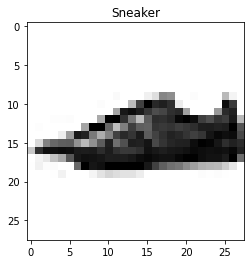

In [116]:
import matplotlib.pyplot as plt 
plt.imshow(X_train[0] , cmap = 'binary' ,interpolation='nearest')
plt.title(class_names[y_train[0]])

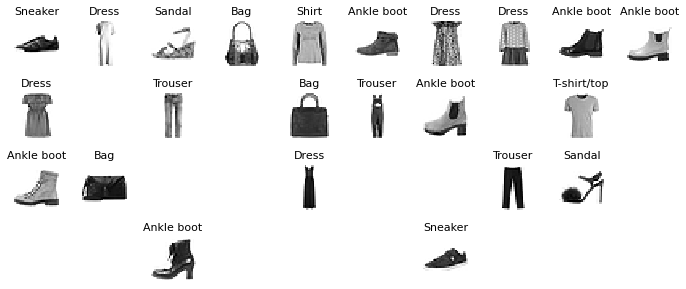

In [117]:
nrows = 4
ncols = 10
plt.figure(figsize=(ncols*1.2 , nrows*1.2))
for row in range(nrows):
    for col in range(ncols):
        index = row*col +col
        plt.subplot(nrows , ncols , index+1)
        plt.imshow(X_train[index] , cmap ='binary' , interpolation='nearest')
        plt.title(class_names[y_train[index]] , fontsize=11)
        plt.axis("off")
plt.subplots_adjust(wspace=0.2 , hspace=0.6)
plt.show()

In [118]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
model.add(tf.keras.layers.Dense(300  , activation ='relu'))
model.add(tf.keras.layers.Dense(100 , activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10 , activation ='softmax'))

In [119]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 300)               235500    
                                                                 
 dense_19 (Dense)            (None, 100)               30100     
                                                                 
 dense_20 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [120]:
X_train , X_valid = X_train/255.0 , X_valid/255.0


In [122]:
y_train , y_valid = tf.keras.utils.to_categorical(y_train) , tf.keras.utils.to_categorical(y_valid)

In [127]:
model.compile(loss = 'categorical_crossentropy' , optimizer='sgd' , 
metrics = ['accuracy'])

In [128]:
len(y_train[0])

10

In [129]:
history = model.fit(X_train , y_train , validation_data=(X_valid , y_valid) , epochs=50)

Epoch 1/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.7482 - accuracy: 0.7514 - val_loss: 0.5587 - val_accuracy: 0.8053
Epoch 2/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5015 - accuracy: 0.8264 - val_loss: 0.4691 - val_accuracy: 0.8363
Epoch 3/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4528 - accuracy: 0.8422 - val_loss: 0.4474 - val_accuracy: 0.8418
Epoch 4/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4247 - accuracy: 0.8497 - val_loss: 0.4279 - val_accuracy: 0.8482
Epoch 5/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4039 - accuracy: 0.8577 - val_loss: 0.4020 - val_accuracy: 0.8562
Epoch 6/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3879 - accuracy: 0.8643 - val_loss: 0.3918 - val_accuracy: 0.8613
Epoch 7/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3757 - accuracy: 0.8671 - val_loss: 0.3854 - val_accuracy:

<AxesSubplot:>

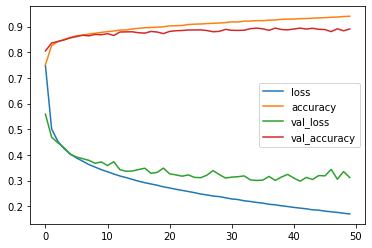

In [134]:
import pandas as pd
pd.DataFrame(history.history).plot(kind = 'line')